In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model


In [3]:
# Import Fifa dataframe
df1=pd.read_csv("/Users/maravallejos/Ironhackk/Miniproject1/fifa21_male2.csv")

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_66765/3743944215.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("/Users/maravallejos/Ironhackk/Miniproject1/fifa21_male2.csv")


In [4]:
# Create dataframe with study variables
df = df1[['Name','Age', 'OVA', 'Nationality', 'Club', 'BP', 'POT', 'Height', 'Weight', 'foot', 'Value', 'Wage', 'Release Clause', 'IR', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality',	'Aggression',	'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping']].copy()
df.head()

,Name,Age,OVA,Nationality,Club,BP,POT,Height,Weight,foot,...,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,"6'0""",181lbs,Left,...,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56
1,Luis García,37,71,Spain,KAS Eupen,CM,71,"5'10""",143lbs,Right,...,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56
2,J. Cole,33,71,England,Coventry City,CAM,71,"5'9""",161lbs,Right,...,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,"5'11""",165lbs,Right,...,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,"5'7""",150lbs,Right,...,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45


## Cleaning

In [5]:
# Change column names to lower case
df.columns = df.columns.str.lower()


In [6]:
# Review variable information. Check for null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              17125 non-null  object 
 1   age               17125 non-null  int64  
 2   ova               17125 non-null  int64  
 3   nationality       17125 non-null  object 
 4   club              17102 non-null  object 
 5   bp                17125 non-null  object 
 6   pot               17125 non-null  int64  
 7   height            17125 non-null  object 
 8   weight            17125 non-null  object 
 9   foot              17125 non-null  object 
 10  value             17125 non-null  object 
 11  wage              17125 non-null  object 
 12  release clause    17125 non-null  object 
 13  ir                17125 non-null  object 
 14  attacking         17125 non-null  int64  
 15  crossing          17125 non-null  int64  
 16  finishing         17125 non-null  int64 

In [7]:
df.isnull().sum()

name                  0
age                   0
ova                   0
nationality           0
club                 23
bp                    0
pot                   0
height                0
weight                0
foot                  0
value                 0
wage                  0
release clause        0
ir                    0
attacking             0
crossing              0
finishing             0
heading accuracy      0
short passing         0
volleys              58
skill                 0
dribbling             0
curve                58
fk accuracy           0
long passing          0
ball control          0
movement              0
acceleration          0
sprint speed          0
agility              58
reactions             0
balance              58
power                 0
shot power            0
jumping              58
stamina               0
strength              0
long shots            0
mentality             0
aggression            0
interceptions         7
positioning     

#### Null values

In [8]:
# For numerical variables volleys, curve, agility, balance, jumping, vision, composure, interceptions, positioning, sliding tacke, replace null values with 0.
df['volleys'].fillna(0, inplace=True)
df['curve'].fillna(0, inplace=True)
df['agility'].fillna(0, inplace=True)
df['balance'].fillna(0, inplace=True)
df['jumping'].fillna(0, inplace=True)
df['vision'].fillna(0, inplace=True)
df['composure'].fillna(0, inplace=True)
df['interceptions'].fillna(0, inplace=True)
df['positioning'].fillna(0, inplace=True)
df['sliding tackle'].fillna(0, inplace=True)
df.isnull().sum()

name                 0
age                  0
ova                  0
nationality          0
club                23
bp                   0
pot                  0
height               0
weight               0
foot                 0
value                0
wage                 0
release clause       0
ir                   0
attacking            0
crossing             0
finishing            0
heading accuracy     0
short passing        0
volleys              0
skill                0
dribbling            0
curve                0
fk accuracy          0
long passing         0
ball control         0
movement             0
acceleration         0
sprint speed         0
agility              0
reactions            0
balance              0
power                0
shot power           0
jumping              0
stamina              0
strength             0
long shots           0
mentality            0
aggression           0
interceptions        0
positioning          0
vision               0
penalties  

#### Variable club

In [9]:
# For categorical variable club replace null values with 'Unknwon'
df['club'].fillna("Unknown", inplace=True)
df.isnull().sum()

name                0
age                 0
ova                 0
nationality         0
club                0
bp                  0
pot                 0
height              0
weight              0
foot                0
value               0
wage                0
release clause      0
ir                  0
attacking           0
crossing            0
finishing           0
heading accuracy    0
short passing       0
volleys             0
skill               0
dribbling           0
curve               0
fk accuracy         0
long passing        0
ball control        0
movement            0
acceleration        0
sprint speed        0
agility             0
reactions           0
balance             0
power               0
shot power          0
jumping             0
stamina             0
strength            0
long shots          0
mentality           0
aggression          0
interceptions       0
positioning         0
vision              0
penalties           0
composure           0
defending 

In [10]:
df.head()

,name,age,ova,nationality,club,bp,pot,height,weight,foot,...,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,"6'0""",181lbs,Left,...,69.0,63.0,66.0,50,0.0,208,70,69,69.0,56
1,Luis García,37,71,Spain,KAS Eupen,CM,71,"5'10""",143lbs,Right,...,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56
2,J. Cole,33,71,England,Coventry City,CAM,71,"5'9""",161lbs,Right,...,39.0,69.0,74.0,66,0.0,99,35,34,30.0,51
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,"5'11""",165lbs,Right,...,70.0,72.0,0.0,70,0.0,75,34,41,0.0,68
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,"5'7""",150lbs,Right,...,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45


#### Variable height

In [11]:
# For variable height convert from feet/inches to centimeters.

# Create new data frame with split value columns
new = df['height'].str.split("'", n = 1, expand = True)
 
# making separate feet column from new data frame
df['feet']= new[0]
 
# making separate inches column from new data frame
df['inches']= new[1]
 
# Dropping old height columns
df.drop(columns =['height'], inplace = True)
 
# df display
df

,name,age,ova,nationality,club,bp,pot,weight,foot,value,...,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,feet,inches
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,181lbs,Left,€625K,...,66.0,50,0.0,208,70,69,69.0,56,6,"0"""
1,Luis García,37,71,Spain,KAS Eupen,CM,71,143lbs,Right,€600K,...,73.0,75,79.0,153,70,43,40.0,56,5,"10"""
2,J. Cole,33,71,England,Coventry City,CAM,71,161lbs,Right,€1.1M,...,74.0,66,0.0,99,35,34,30.0,51,5,"9"""
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,165lbs,Right,€0,...,0.0,70,0.0,75,34,41,0.0,68,5,"11"""
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,150lbs,Right,€5.5M,...,93.0,71,89.0,181,68,57,56.0,45,5,"7"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,CB,69,165lbs,Right,€550K,...,29.0,39,46.0,198,61,71,66.0,39,6,"6"""
17121,W. Rickard,18,56,Wales,Burnley,CAM,66,170lbs,Right,€130K,...,53.0,50,46.0,132,34,42,56.0,57,5,"10"""
17122,C. Barrett,18,56,England,Burnley,RB,67,154lbs,Right,€130K,...,45.0,49,43.0,163,55,54,54.0,40,5,"9"""
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,RB,73,148lbs,Right,€475K,...,56.0,36,54.0,180,57,62,61.0,51,5,"9"""


In [12]:
# For variable inches eliminate strings
df['inches']=df['inches'].str.extract(pat='(\d+)', expand=False)

In [13]:
# For variable inches and feet convert to float
df.inches = df.inches.astype('float')
df.feet=df.feet.astype('float')
df.head()

,name,age,ova,nationality,club,bp,pot,weight,foot,value,...,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,feet,inches
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,181lbs,Left,€625K,...,66.0,50,0.0,208,70,69,69.0,56,6.0,0.0
1,Luis García,37,71,Spain,KAS Eupen,CM,71,143lbs,Right,€600K,...,73.0,75,79.0,153,70,43,40.0,56,5.0,10.0
2,J. Cole,33,71,England,Coventry City,CAM,71,161lbs,Right,€1.1M,...,74.0,66,0.0,99,35,34,30.0,51,5.0,9.0
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,165lbs,Right,€0,...,0.0,70,0.0,75,34,41,0.0,68,5.0,11.0
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,150lbs,Right,€5.5M,...,93.0,71,89.0,181,68,57,56.0,45,5.0,7.0


In [14]:
# For variable inches and feet convert to centimeter
df['inches'] = df['inches'].multiply(2.54).round(2)
df['feet'] = df['feet'].multiply(30.48).round(2)

# Create new variable height by adding values of variable inches and feet.
df['height']=df['inches']+df['feet']

# Drop variable feet and inches
df=df.drop(columns=['feet', 'inches'])
df

,name,age,ova,nationality,club,bp,pot,weight,foot,value,...,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,height
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,181lbs,Left,€625K,...,63.0,66.0,50,0.0,208,70,69,69.0,56,182.88
1,Luis García,37,71,Spain,KAS Eupen,CM,71,143lbs,Right,€600K,...,72.0,73.0,75,79.0,153,70,43,40.0,56,177.80
2,J. Cole,33,71,England,Coventry City,CAM,71,161lbs,Right,€1.1M,...,69.0,74.0,66,0.0,99,35,34,30.0,51,175.26
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,165lbs,Right,€0,...,72.0,0.0,70,0.0,75,34,41,0.0,68,180.34
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,150lbs,Right,€5.5M,...,78.0,93.0,71,89.0,181,68,57,56.0,45,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,CB,69,165lbs,Right,€550K,...,23.0,29.0,39,46.0,198,61,71,66.0,39,198.12
17121,W. Rickard,18,56,Wales,Burnley,CAM,66,170lbs,Right,€130K,...,55.0,53.0,50,46.0,132,34,42,56.0,57,177.80
17122,C. Barrett,18,56,England,Burnley,RB,67,154lbs,Right,€130K,...,49.0,45.0,49,43.0,163,55,54,54.0,40,175.26
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,RB,73,148lbs,Right,€475K,...,46.0,56.0,36,54.0,180,57,62,61.0,51,175.26


#### Variable weight

In [15]:
# Convert variable weight from punds to kilograms

# For variable weight drop string lbs
df['weight']=df['weight'].str.extract(pat='(\d+)', expand=False)
df.weight = df.weight.astype('int64')
df

,name,age,ova,nationality,club,bp,pot,weight,foot,value,...,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,height
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,181,Left,€625K,...,63.0,66.0,50,0.0,208,70,69,69.0,56,182.88
1,Luis García,37,71,Spain,KAS Eupen,CM,71,143,Right,€600K,...,72.0,73.0,75,79.0,153,70,43,40.0,56,177.80
2,J. Cole,33,71,England,Coventry City,CAM,71,161,Right,€1.1M,...,69.0,74.0,66,0.0,99,35,34,30.0,51,175.26
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,165,Right,€0,...,72.0,0.0,70,0.0,75,34,41,0.0,68,180.34
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,150,Right,€5.5M,...,78.0,93.0,71,89.0,181,68,57,56.0,45,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,CB,69,165,Right,€550K,...,23.0,29.0,39,46.0,198,61,71,66.0,39,198.12
17121,W. Rickard,18,56,Wales,Burnley,CAM,66,170,Right,€130K,...,55.0,53.0,50,46.0,132,34,42,56.0,57,177.80
17122,C. Barrett,18,56,England,Burnley,RB,67,154,Right,€130K,...,49.0,45.0,49,43.0,163,55,54,54.0,40,175.26
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,RB,73,148,Right,€475K,...,46.0,56.0,36,54.0,180,57,62,61.0,51,175.26


In [16]:
# For variable weight convert pounds to kilograms. 1 pound = 0.453592 kg.
df['weight'] = df['weight'].multiply(0.453592).round(2)
df

,name,age,ova,nationality,club,bp,pot,weight,foot,value,...,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,height
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,82.10,Left,€625K,...,63.0,66.0,50,0.0,208,70,69,69.0,56,182.88
1,Luis García,37,71,Spain,KAS Eupen,CM,71,64.86,Right,€600K,...,72.0,73.0,75,79.0,153,70,43,40.0,56,177.80
2,J. Cole,33,71,England,Coventry City,CAM,71,73.03,Right,€1.1M,...,69.0,74.0,66,0.0,99,35,34,30.0,51,175.26
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,74.84,Right,€0,...,72.0,0.0,70,0.0,75,34,41,0.0,68,180.34
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,68.04,Right,€5.5M,...,78.0,93.0,71,89.0,181,68,57,56.0,45,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,CB,69,74.84,Right,€550K,...,23.0,29.0,39,46.0,198,61,71,66.0,39,198.12
17121,W. Rickard,18,56,Wales,Burnley,CAM,66,77.11,Right,€130K,...,55.0,53.0,50,46.0,132,34,42,56.0,57,177.80
17122,C. Barrett,18,56,England,Burnley,RB,67,69.85,Right,€130K,...,49.0,45.0,49,43.0,163,55,54,54.0,40,175.26
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,RB,73,67.13,Right,€475K,...,46.0,56.0,36,54.0,180,57,62,61.0,51,175.26


#### Variable value

In [17]:
# For variable value eliminate string € 
df['value']=df['value'].str.replace('€','')

# For variable value convert to numerical thousend and million
df['value'] = df['value'].replace({'K': '*1000', 'M': '*1000000'}, regex=True).map(pd.eval).astype(int)

df


,name,age,ova,nationality,club,bp,pot,weight,foot,value,...,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,height
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,82.10,Left,625000,...,63.0,66.0,50,0.0,208,70,69,69.0,56,182.88
1,Luis García,37,71,Spain,KAS Eupen,CM,71,64.86,Right,600000,...,72.0,73.0,75,79.0,153,70,43,40.0,56,177.80
2,J. Cole,33,71,England,Coventry City,CAM,71,73.03,Right,1100000,...,69.0,74.0,66,0.0,99,35,34,30.0,51,175.26
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,74.84,Right,0,...,72.0,0.0,70,0.0,75,34,41,0.0,68,180.34
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,68.04,Right,5500000,...,78.0,93.0,71,89.0,181,68,57,56.0,45,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,CB,69,74.84,Right,550000,...,23.0,29.0,39,46.0,198,61,71,66.0,39,198.12
17121,W. Rickard,18,56,Wales,Burnley,CAM,66,77.11,Right,130000,...,55.0,53.0,50,46.0,132,34,42,56.0,57,177.80
17122,C. Barrett,18,56,England,Burnley,RB,67,69.85,Right,130000,...,49.0,45.0,49,43.0,163,55,54,54.0,40,175.26
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,RB,73,67.13,Right,475000,...,46.0,56.0,36,54.0,180,57,62,61.0,51,175.26


#### Variable wage

In [18]:
# For variable wage eliminat string € and K

df['wage']=df['wage'].str.replace('€','')
df['wage']=df['wage'].str.replace('K','')

# Convert to float
df.wage = df.wage.astype('int')

# Multiply by 1000 to convert to thousend
df['wage'] = df['wage'].multiply(100).round(2)

df

,name,age,ova,nationality,club,bp,pot,weight,foot,value,...,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,height
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,82.10,Left,625000,...,63.0,66.0,50,0.0,208,70,69,69.0,56,182.88
1,Luis García,37,71,Spain,KAS Eupen,CM,71,64.86,Right,600000,...,72.0,73.0,75,79.0,153,70,43,40.0,56,177.80
2,J. Cole,33,71,England,Coventry City,CAM,71,73.03,Right,1100000,...,69.0,74.0,66,0.0,99,35,34,30.0,51,175.26
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,74.84,Right,0,...,72.0,0.0,70,0.0,75,34,41,0.0,68,180.34
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,68.04,Right,5500000,...,78.0,93.0,71,89.0,181,68,57,56.0,45,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,CB,69,74.84,Right,550000,...,23.0,29.0,39,46.0,198,61,71,66.0,39,198.12
17121,W. Rickard,18,56,Wales,Burnley,CAM,66,77.11,Right,130000,...,55.0,53.0,50,46.0,132,34,42,56.0,57,177.80
17122,C. Barrett,18,56,England,Burnley,RB,67,69.85,Right,130000,...,49.0,45.0,49,43.0,163,55,54,54.0,40,175.26
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,RB,73,67.13,Right,475000,...,46.0,56.0,36,54.0,180,57,62,61.0,51,175.26


#### Variable release clause

In [19]:
# For variable release clause eliminiate symbol and change to thousends and millions

df['release clause']=df['release clause'].str.replace('€','')

df['release clause'] = df['release clause'].replace({'K': '*1000', 'M': '*1000000'}, regex=True).map(pd.eval).astype(int)

df

,name,age,ova,nationality,club,bp,pot,weight,foot,value,...,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,height
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,82.10,Left,625000,...,63.0,66.0,50,0.0,208,70,69,69.0,56,182.88
1,Luis García,37,71,Spain,KAS Eupen,CM,71,64.86,Right,600000,...,72.0,73.0,75,79.0,153,70,43,40.0,56,177.80
2,J. Cole,33,71,England,Coventry City,CAM,71,73.03,Right,1100000,...,69.0,74.0,66,0.0,99,35,34,30.0,51,175.26
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,74.84,Right,0,...,72.0,0.0,70,0.0,75,34,41,0.0,68,180.34
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,68.04,Right,5500000,...,78.0,93.0,71,89.0,181,68,57,56.0,45,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,CB,69,74.84,Right,550000,...,23.0,29.0,39,46.0,198,61,71,66.0,39,198.12
17121,W. Rickard,18,56,Wales,Burnley,CAM,66,77.11,Right,130000,...,55.0,53.0,50,46.0,132,34,42,56.0,57,177.80
17122,C. Barrett,18,56,England,Burnley,RB,67,69.85,Right,130000,...,49.0,45.0,49,43.0,163,55,54,54.0,40,175.26
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,RB,73,67.13,Right,475000,...,46.0,56.0,36,54.0,180,57,62,61.0,51,175.26


#### Variable international reputation (ir)

In [20]:
# For variable ir drop symbols
df['ir']=df['ir'].str.extract(pat='(\d+)', expand=False)
df.ir = df.ir.astype('int64')
df

,name,age,ova,nationality,club,bp,pot,weight,foot,value,...,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,height
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,82.10,Left,625000,...,63.0,66.0,50,0.0,208,70,69,69.0,56,182.88
1,Luis García,37,71,Spain,KAS Eupen,CM,71,64.86,Right,600000,...,72.0,73.0,75,79.0,153,70,43,40.0,56,177.80
2,J. Cole,33,71,England,Coventry City,CAM,71,73.03,Right,1100000,...,69.0,74.0,66,0.0,99,35,34,30.0,51,175.26
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,74.84,Right,0,...,72.0,0.0,70,0.0,75,34,41,0.0,68,180.34
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,68.04,Right,5500000,...,78.0,93.0,71,89.0,181,68,57,56.0,45,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,CB,69,74.84,Right,550000,...,23.0,29.0,39,46.0,198,61,71,66.0,39,198.12
17121,W. Rickard,18,56,Wales,Burnley,CAM,66,77.11,Right,130000,...,55.0,53.0,50,46.0,132,34,42,56.0,57,177.80
17122,C. Barrett,18,56,England,Burnley,RB,67,69.85,Right,130000,...,49.0,45.0,49,43.0,163,55,54,54.0,40,175.26
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,RB,73,67.13,Right,475000,...,46.0,56.0,36,54.0,180,57,62,61.0,51,175.26


### Create dataframe with numerical variables

In [21]:
df_num=df.select_dtypes(include=np.number)
df_num.describe()

,age,ova,pot,weight,value,wage,release clause,ir,attacking,crossing,...,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,height
count,17125.000000,17125.000000,17125.000000,17125.000000,1.712500e+04,17125.000000,1.712500e+04,17125.000000,17125.000000,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,25.272934,66.965022,72.489810,75.140899,2.567377e+06,10640.192701,4.574445e+06,1.152234,258.537752,51.621314,...,52.351358,55.255825,50.251445,58.460380,141.469898,47.246949,48.279358,45.943591,77.609693,181.222956
std,4.942665,6.864329,5.769949,7.175204,5.372622e+06,22310.310137,1.033846e+07,0.461311,72.255687,17.875715,...,19.119861,14.080238,15.696363,14.874077,61.595180,20.182548,21.483597,21.318169,81.136603,6.886553
min,16.000000,38.000000,47.000000,49.900000,0.000000e+00,0.000000,0.000000e+00,1.000000,33.000000,6.000000,...,0.000000,0.000000,7.000000,0.000000,17.000000,3.000000,5.000000,0.000000,5.000000,154.940000
25%,21.000000,62.000000,69.000000,69.850000,3.750000e+05,300.000000,5.080000e+05,1.000000,232.000000,41.000000,...,43.000000,46.000000,40.000000,52.000000,84.000000,29.000000,28.000000,25.000000,48.000000,175.260000
50%,25.000000,67.000000,72.000000,74.840000,8.000000e+05,700.000000,1.300000e+06,1.000000,271.000000,56.000000,...,57.000000,57.000000,51.000000,60.000000,158.000000,52.000000,55.000000,52.000000,53.000000,180.340000
75%,29.000000,72.000000,76.000000,79.830000,2.400000e+06,3000.000000,3.900000e+06,1.000000,306.000000,65.000000,...,66.000000,65.000000,62.000000,68.000000,194.000000,64.000000,66.000000,64.000000,59.000000,185.420000
max,53.000000,93.000000,95.000000,110.220000,1.055000e+08,95000.000000,2.031000e+08,5.000000,437.000000,94.000000,...,96.000000,95.000000,94.000000,96.000000,272.000000,94.000000,93.000000,95.000000,440.000000,205.740000


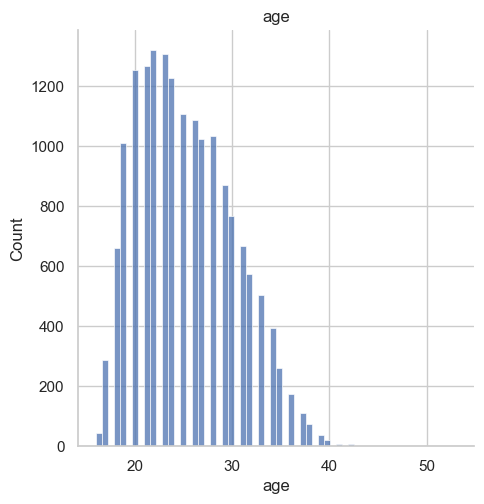

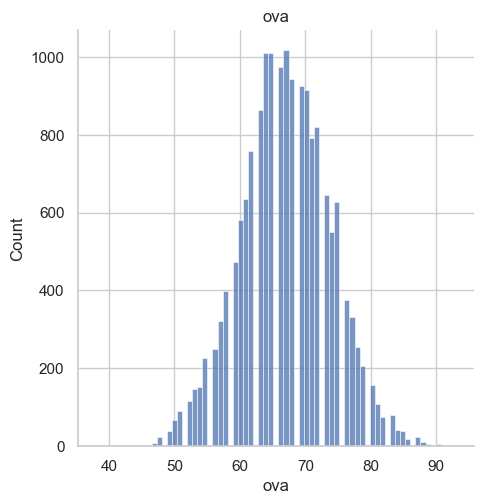

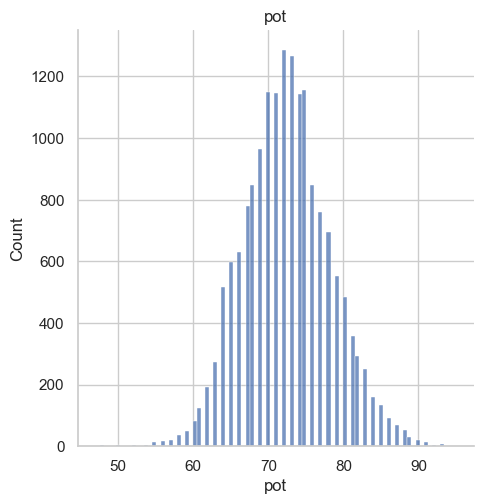

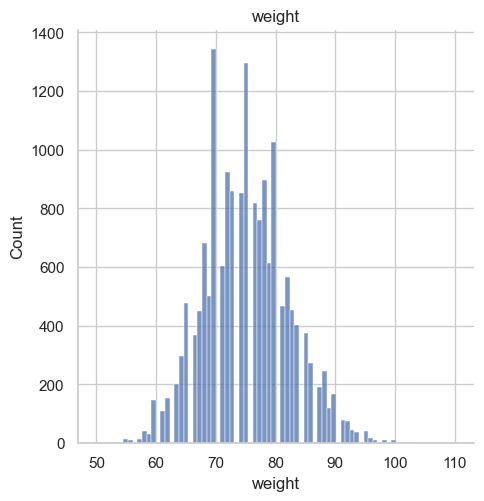

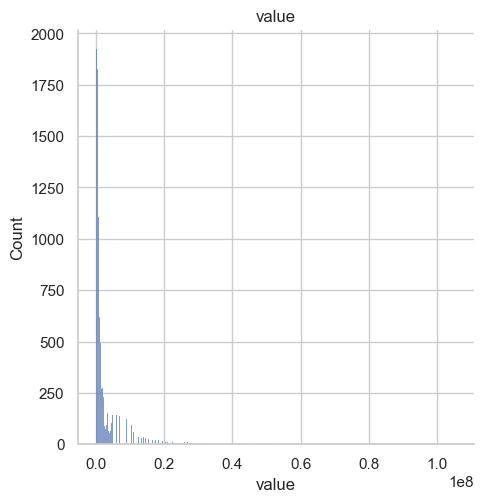

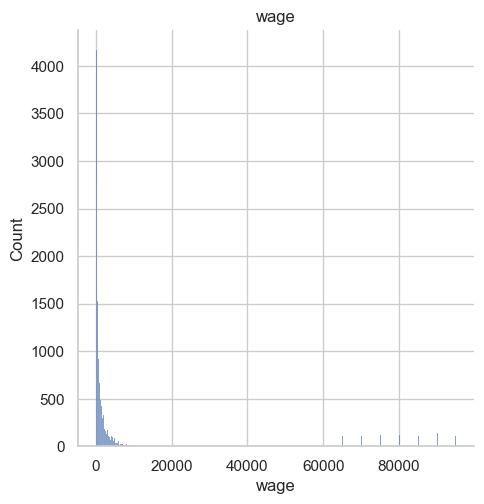

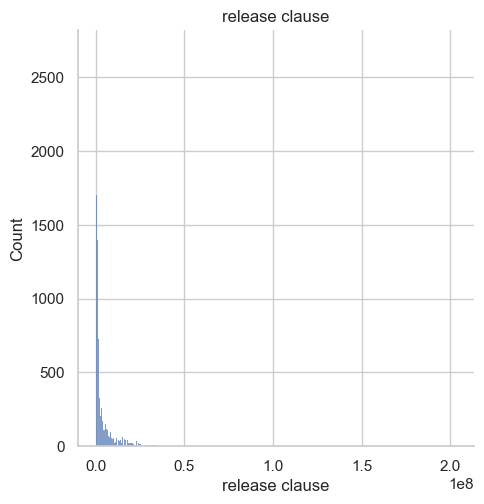

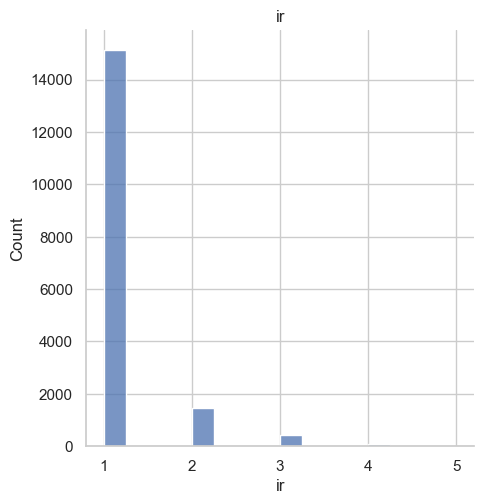

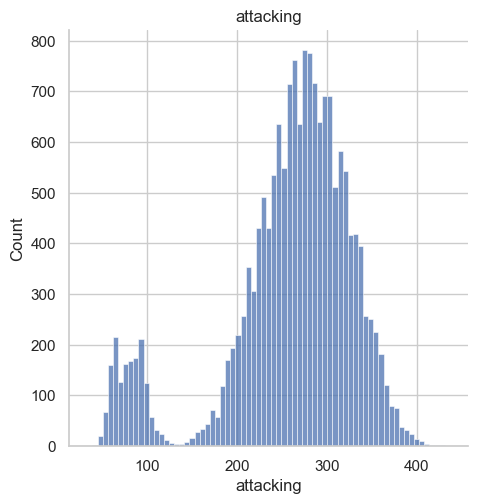

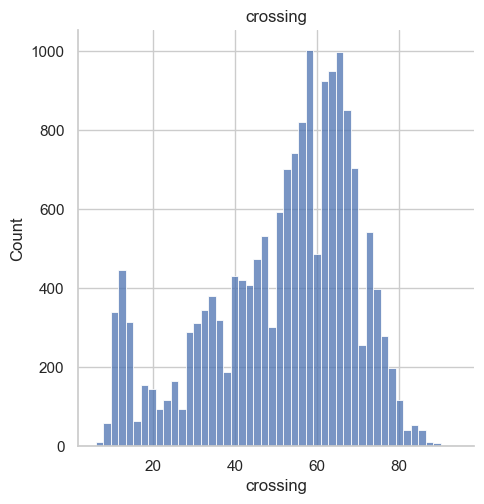

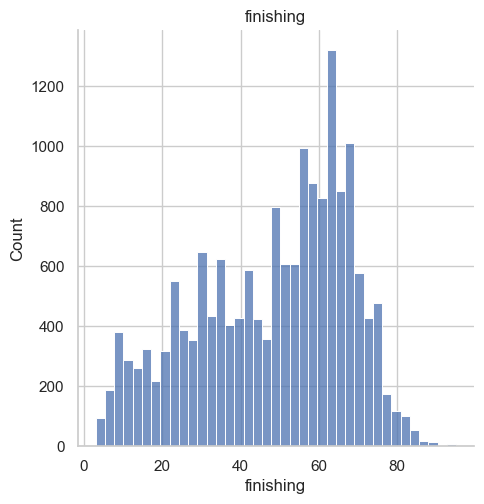

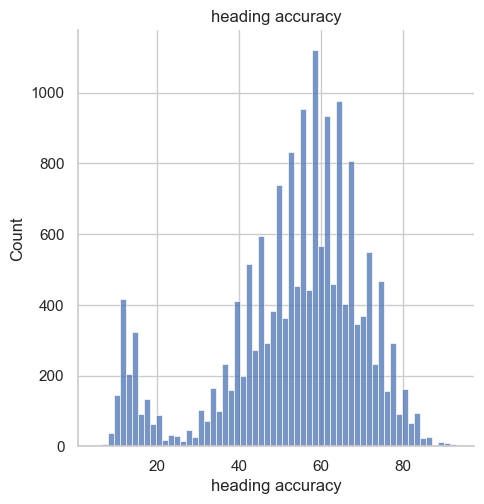

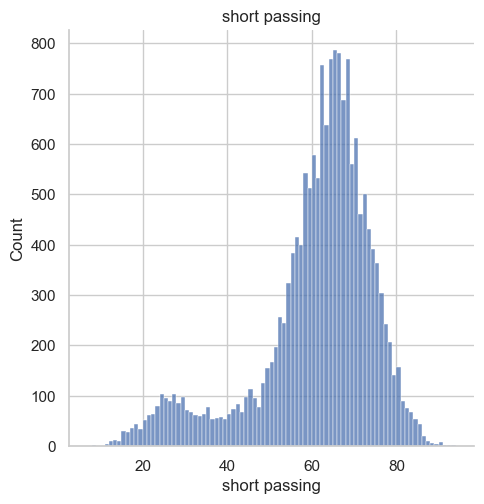

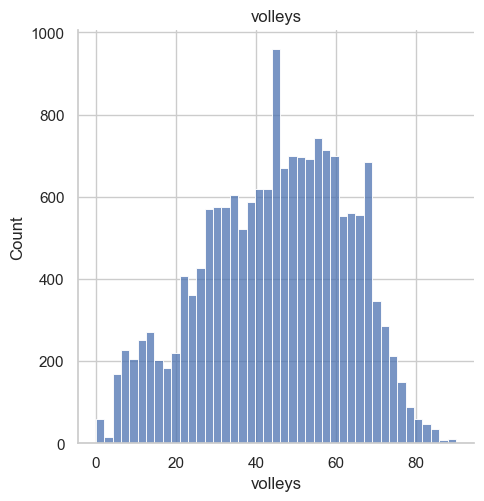

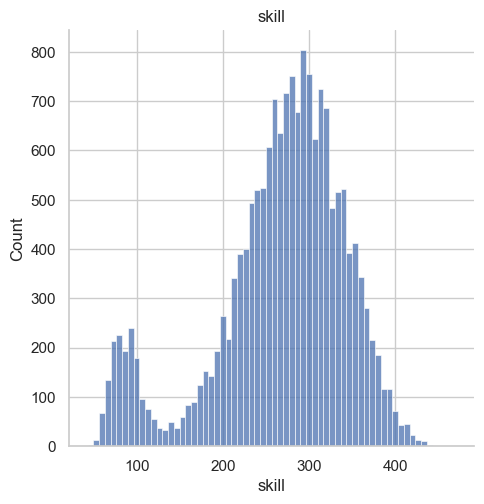

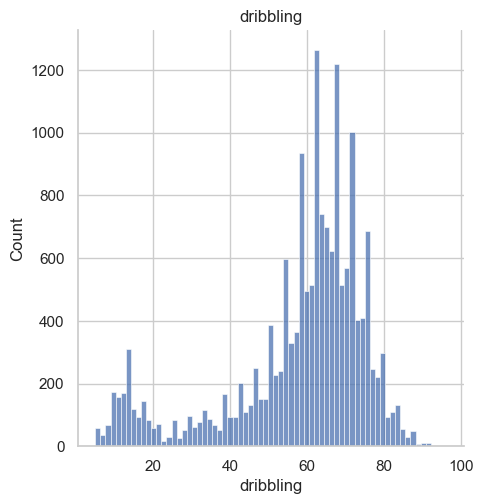

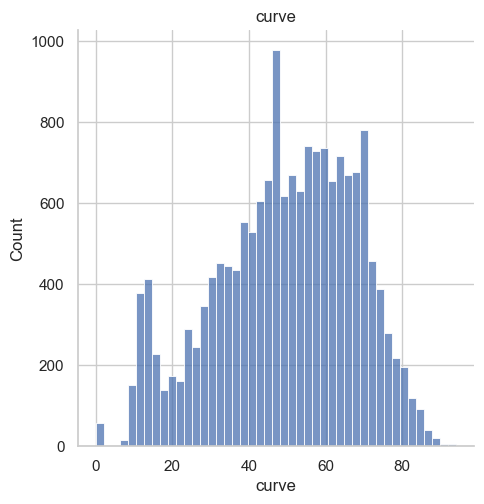

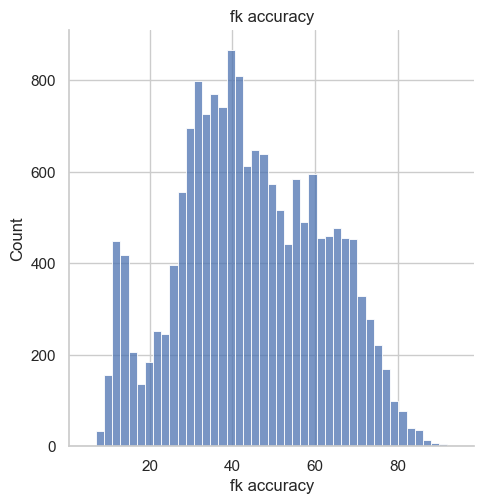

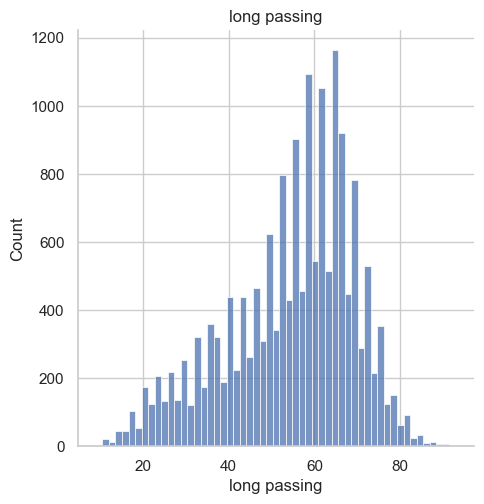

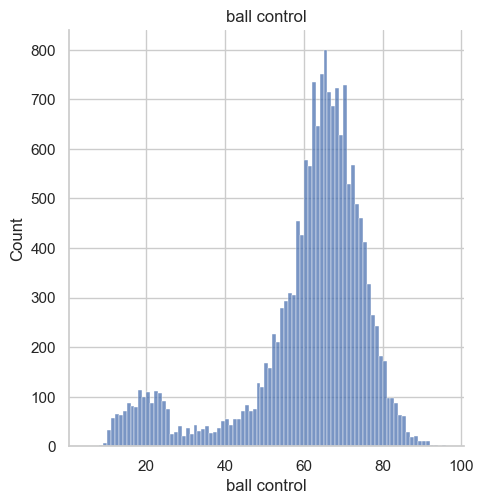

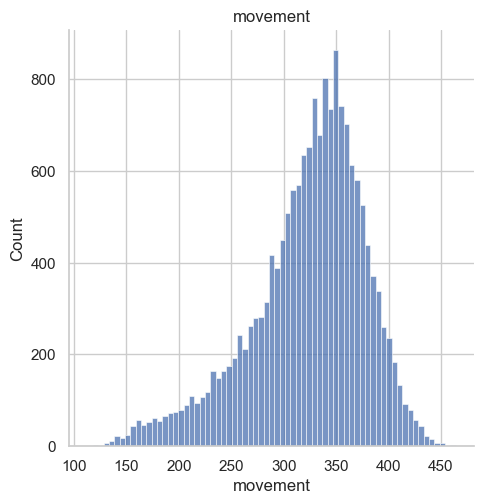

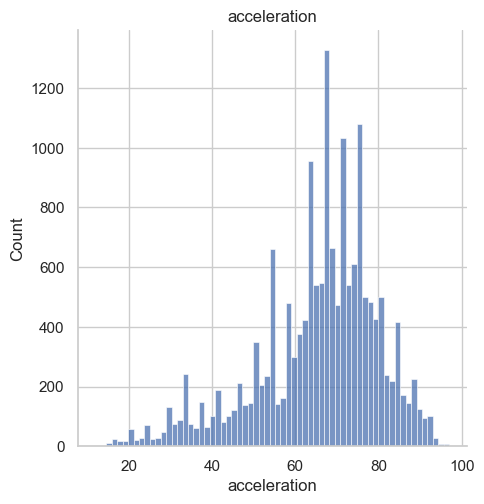

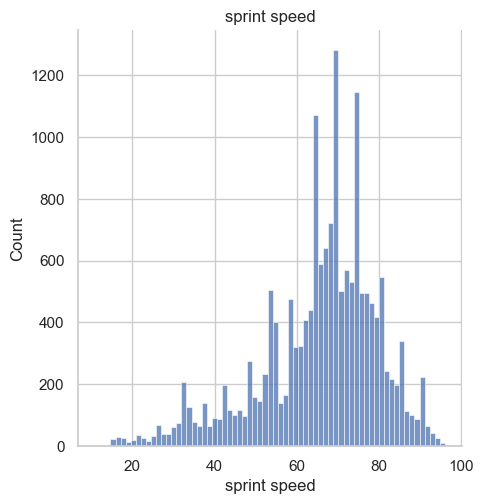

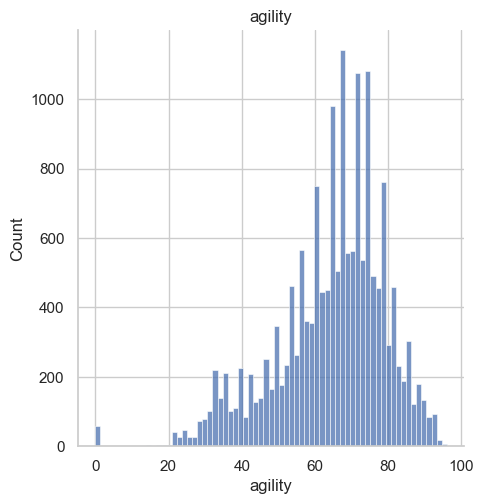

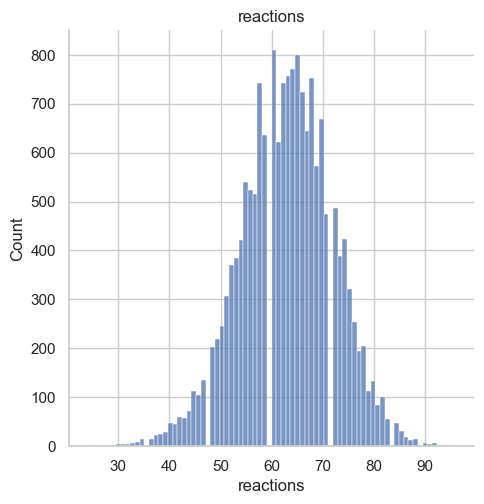

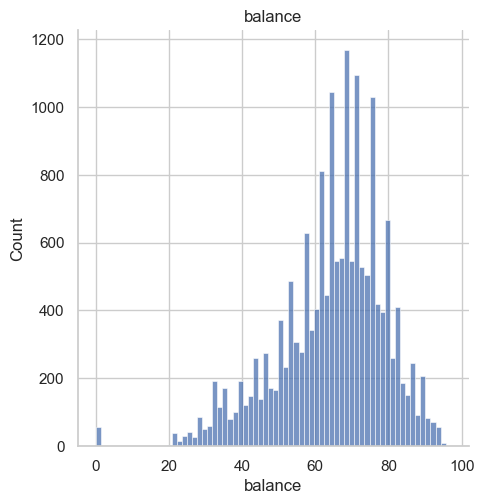

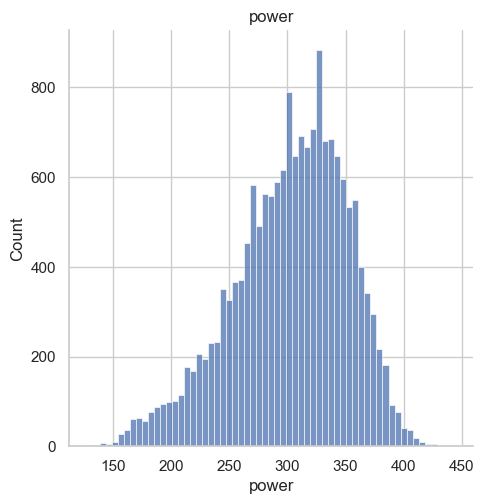

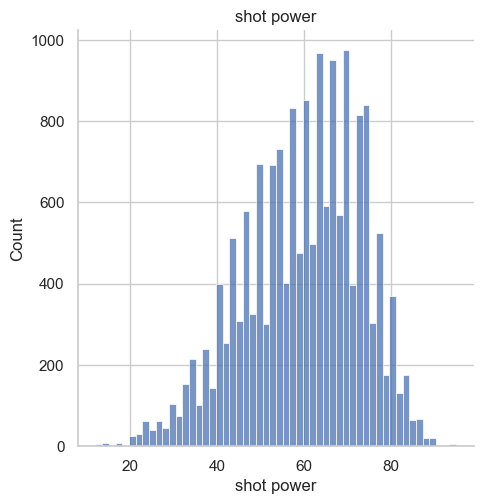

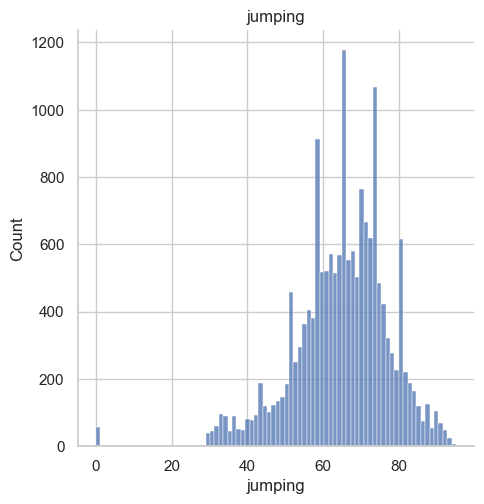

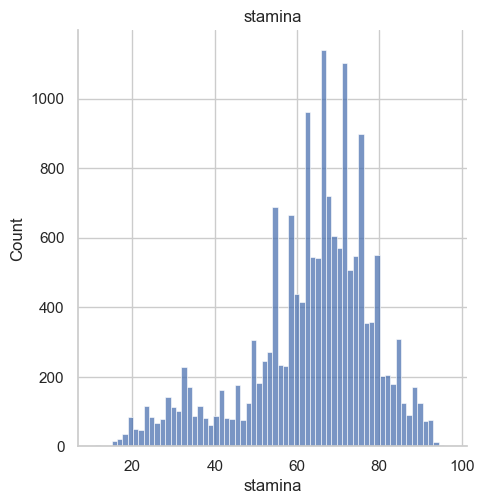

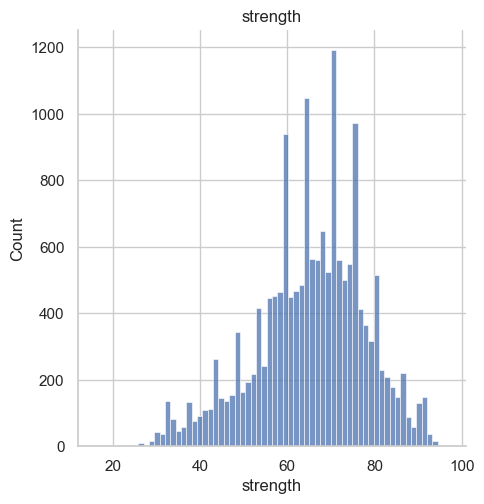

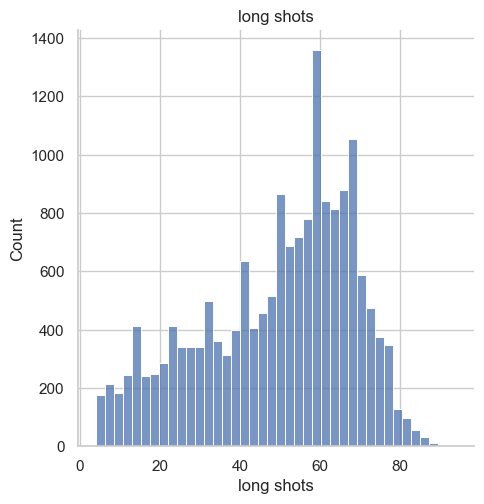

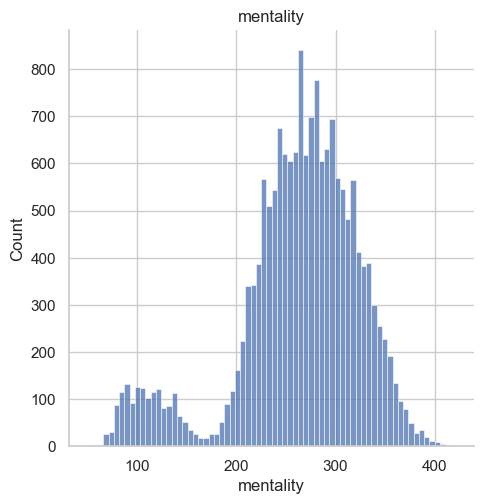

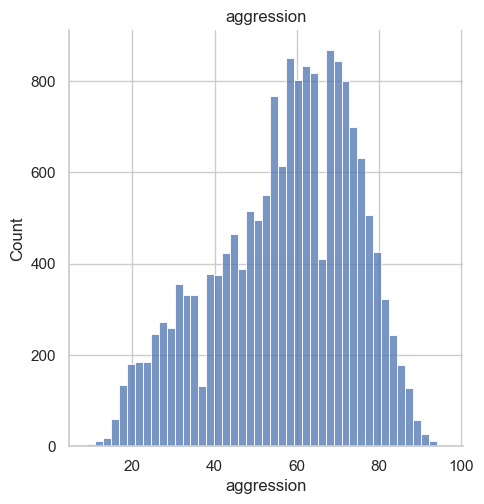

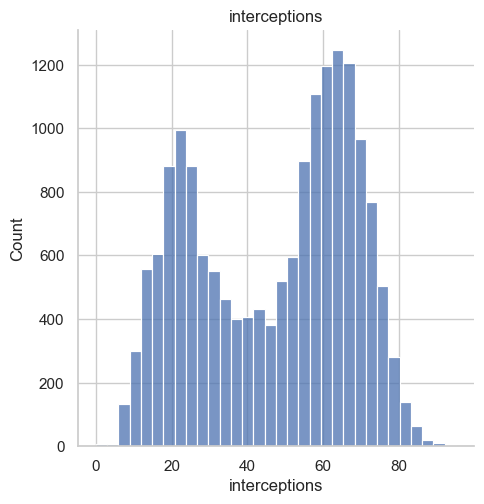

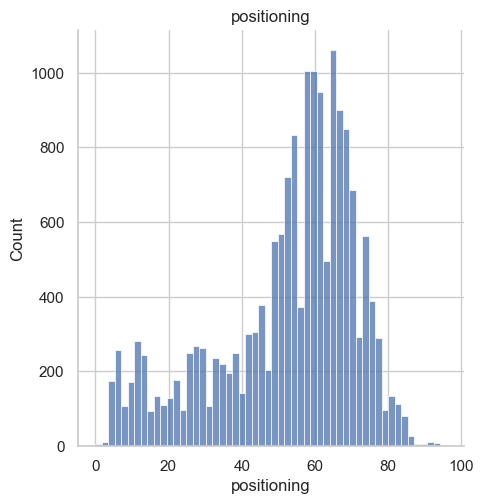

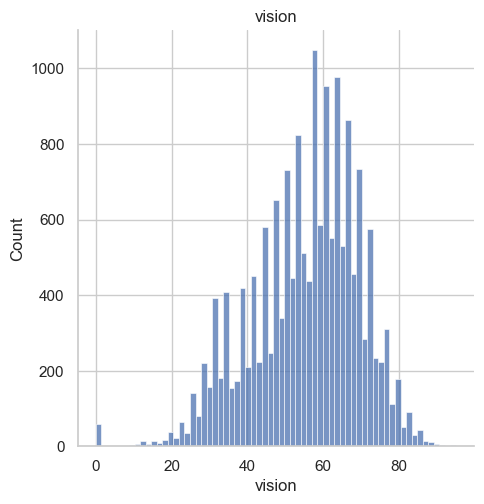

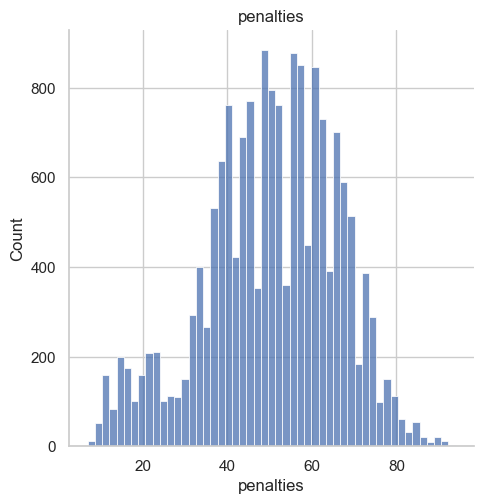

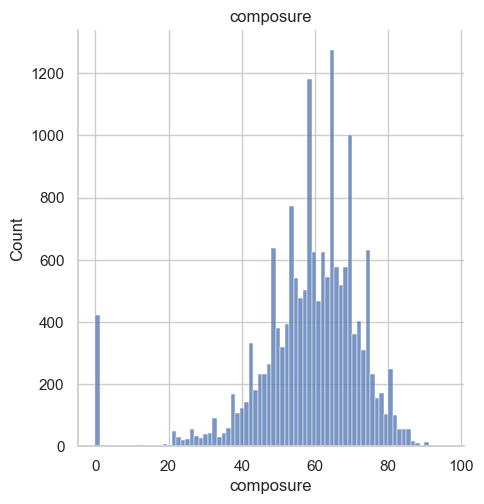

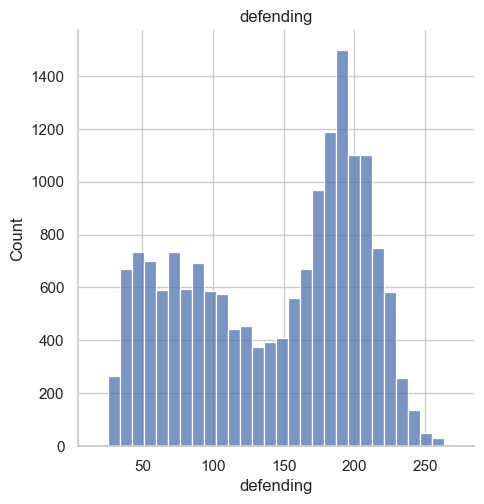

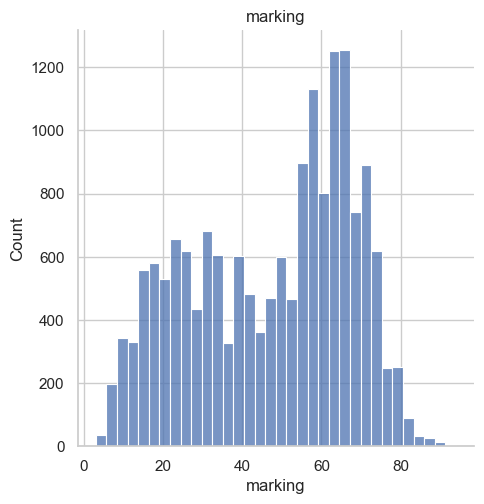

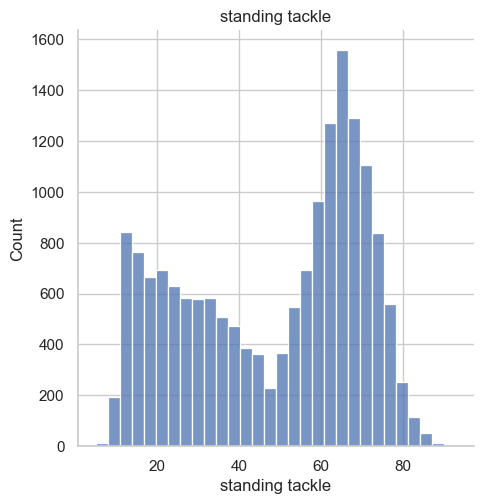

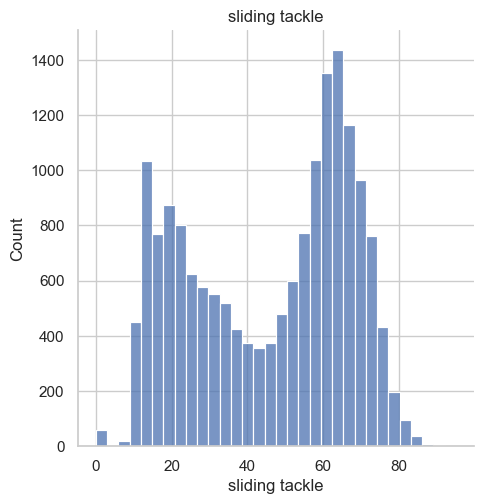

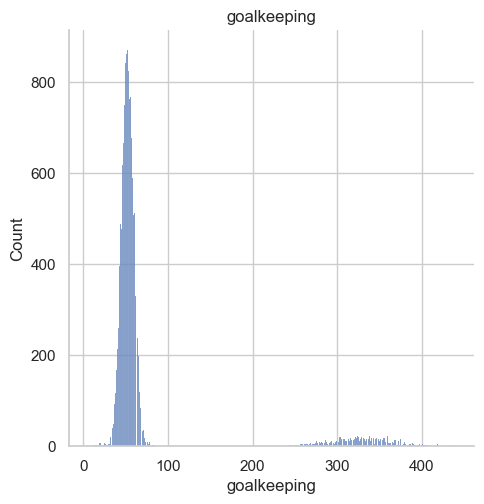

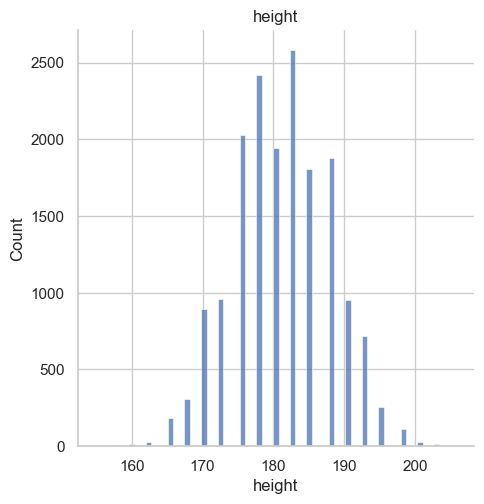

In [22]:
# Grpah for numerical variables

for col in df_num.columns:
    sns.displot(df_num[col])
    plt.title(col)
    plt.show()

In [23]:
# Standarize magnitudes using standardscaler
standard_scaler=StandardScaler()
df_num_ss=standard_scaler.fit_transform(df_num)
df_num_final=pd.DataFrame(df_num_ss, columns=df_num.columns)
df_num_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               17125 non-null  float64
 1   ova               17125 non-null  float64
 2   pot               17125 non-null  float64
 3   weight            17125 non-null  float64
 4   value             17125 non-null  float64
 5   wage              17125 non-null  float64
 6   release clause    17125 non-null  float64
 7   ir                17125 non-null  float64
 8   attacking         17125 non-null  float64
 9   crossing          17125 non-null  float64
 10  finishing         17125 non-null  float64
 11  heading accuracy  17125 non-null  float64
 12  short passing     17125 non-null  float64
 13  volleys           17125 non-null  float64
 14  skill             17125 non-null  float64
 15  dribbling         17125 non-null  float64
 16  curve             17125 non-null  float6

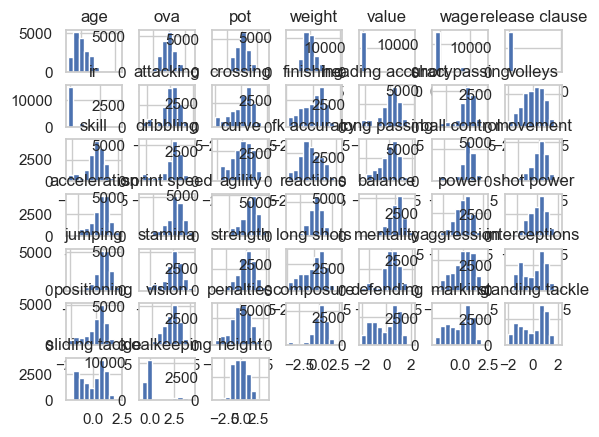

In [24]:
df_num_final.hist()
plt.show()

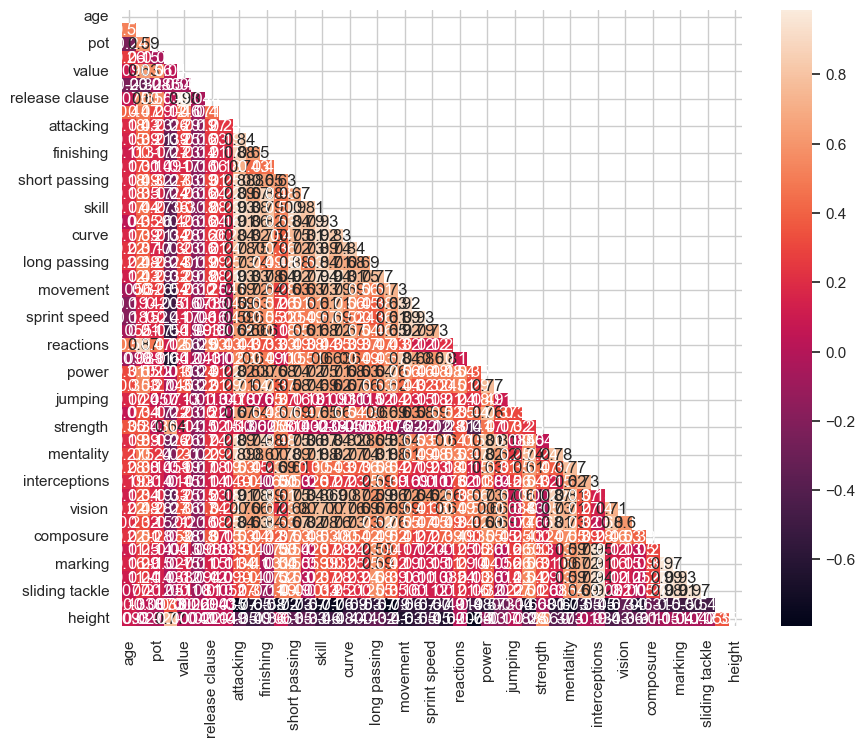

In [25]:
# Check for correlations with heatmap

df_num_corr = df_num_final.corr()
mask = np.zeros_like(df_num_corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_num_corr, mask=mask, annot=True)
plt.show()

In [26]:
# Check for correlations with correlations table
df_num_corr

,age,ova,pot,weight,value,wage,release clause,ir,attacking,crossing,...,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,height
age,1.000000,0.517099,-0.237619,0.258689,0.095981,-0.229721,0.075386,0.403141,0.183954,0.151022,...,0.121219,0.215431,0.198917,0.224921,0.114796,0.155497,0.106178,0.077468,0.125933,0.092935
ova,0.517099,1.000000,0.592268,0.151841,0.631679,-0.317022,0.597617,0.474492,0.431238,0.386334,...,0.338562,0.484600,0.317666,0.509425,0.248247,0.290071,0.237478,0.203328,0.038222,0.027077
pot,-0.237619,0.592268,1.000000,-0.039808,0.563570,-0.085939,0.549201,0.293444,0.233866,0.210944,...,0.190962,0.284855,0.147044,0.283559,0.138748,0.147320,0.138787,0.121552,-0.007277,-0.021094
weight,0.258689,0.151841,-0.039808,1.000000,0.040258,-0.053733,0.034724,0.121788,-0.258555,-0.394278,...,-0.331686,-0.269308,-0.211265,-0.051599,-0.039578,-0.026687,-0.038173,-0.050620,0.326940,0.766069
value,0.095981,0.631679,0.563570,0.040258,1.000000,-0.063793,0.979295,0.459631,0.289886,0.249098,...,0.245213,0.358206,0.201095,0.378157,0.130548,0.153409,0.124010,0.106987,0.002641,-0.000407
wage,-0.229721,-0.317022,-0.085939,-0.053733,-0.063793,1.000000,-0.043901,-0.071149,-0.188810,-0.160201,...,-0.148909,-0.167847,-0.156010,-0.175498,-0.098021,-0.114261,-0.093521,-0.080793,0.029441,-0.021715
release clause,0.075386,0.597617,0.549201,0.034724,0.979295,-0.043901,1.000000,0.427376,0.269036,0.231914,...,0.226994,0.336077,0.182665,0.374093,0.127223,0.148889,0.120989,0.104704,0.004279,0.001362
ir,0.403141,0.474492,0.293444,0.121788,0.459631,-0.071149,0.427376,1.000000,0.235135,0.189826,...,0.180552,0.240257,0.249937,0.149414,0.084993,0.109565,0.089852,0.051294,0.015219,0.049294
attacking,0.183954,0.431238,0.233866,-0.258555,0.289886,-0.188810,0.269036,0.235135,1.000000,0.843765,...,0.907590,0.704433,0.838585,0.528104,0.313363,0.342181,0.308756,0.270303,-0.768449,-0.354000
crossing,0.151022,0.386334,0.210944,-0.394278,0.249098,-0.160201,0.231914,0.189826,0.843765,1.000000,...,0.782507,0.661012,0.633326,0.435432,0.401941,0.410757,0.397512,0.371868,-0.653662,-0.493419


Variables OVA and BOV, and variables Value and Release Clause are highly correlated, therefor variable BOV and variable Release Clause are dropped. 

In [27]:
# Drop correlated variables
df_num_final=df_num_final.drop(['release clause', 'attacking', 'defending', 'standing tackle', 'sliding tackle', 'standing tackle'], axis=1)
df_num_final

,age,ova,pot,weight,value,wage,ir,crossing,finishing,heading accuracy,...,mentality,aggression,interceptions,positioning,vision,penalties,composure,marking,goalkeeping,height
0,1.563385,0.296466,-0.604843,0.969910,-0.361543,-0.445556,1.837785,1.307884,0.105375,0.318716,...,0.923148,0.881385,1.051291,0.556958,0.763090,-0.016020,-3.930468,1.127396,-0.266345,0.240627
1,2.372689,0.587835,-0.258209,-1.432879,-0.366196,-0.445556,-0.330011,0.916280,0.827360,0.436733,...,1.590746,0.822634,1.147152,1.027686,1.260255,1.576752,1.380941,1.127396,-0.266345,-0.497064
2,1.563385,0.587835,-0.258209,-0.294202,-0.273129,-0.409697,1.837785,1.587602,0.827360,-0.743440,...,0.875463,0.705133,-0.386623,0.870777,1.331279,1.003354,-3.930468,-0.606827,-0.327971,-0.865909
3,2.170363,0.150781,1.648276,-0.041937,-0.477877,-0.476932,-0.330011,0.133072,1.136783,0.377724,...,0.144284,0.117628,1.099221,1.027686,-3.924468,1.258198,-3.930468,-0.656376,-0.118442,-0.128218
4,2.170363,2.044685,1.474959,-0.989673,0.545862,-0.423144,6.173378,1.307884,1.085212,0.023672,...,1.717908,0.058877,1.099221,1.341505,2.680727,1.321909,2.053271,1.028297,-0.401923,-1.603600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,-0.662199,-0.431959,-0.604843,-0.041937,-0.375503,-0.467967,-0.330011,-0.929854,-1.287025,0.731776,...,-0.698161,0.705133,0.524056,-1.535169,-1.864783,-0.716840,-0.837749,0.681453,-0.475874,2.453700
17121,-1.471503,-1.597438,-1.124793,0.274439,-0.453679,-0.463485,-0.330011,-0.090702,-0.255617,-0.212362,...,-0.046459,-0.352376,0.140612,0.138532,-0.160217,-0.016020,-0.837749,-0.656376,-0.254020,-0.497064
17122,-1.471503,-1.597438,-0.951476,-0.737408,-0.453679,-0.467967,-0.330011,0.189015,-0.719751,-0.035336,...,-0.094144,0.058877,0.380264,-0.175287,-0.728406,-0.079731,-1.039448,0.384158,-0.463549,-0.865909
17123,-1.066851,-0.723329,0.088424,-1.116502,-0.389463,-0.463485,-0.330011,0.580620,-1.132314,-0.094345,...,-0.078249,0.235129,0.524056,-0.332196,0.052854,-0.907972,-0.299885,0.483256,-0.327971,-0.865909


### Create dataframe with categorical variables

In [28]:
df_cat=df.select_dtypes(include=object)
df_cat=df_cat.drop(columns=['name','nationality', 'club'])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bp      17125 non-null  object
 1   foot    17125 non-null  object
dtypes: object(2)
memory usage: 267.7+ KB


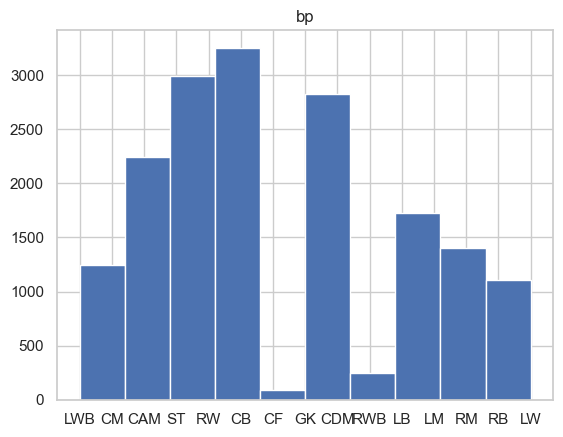

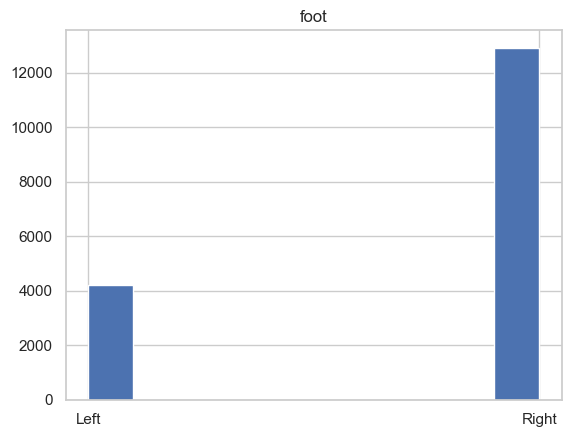

In [29]:
# Plot histograms for categorical variables
for col in df_cat.columns:
    plt.hist(df_cat[col])
    plt.title(col)
    plt.show()

#### Encode categorical variables

In [30]:
# 1. Set DataFrame: concatenate dataframe with normalized numerical variables and dataframe with categorical variables (df_tt --> DataFrame to be used for Train-Test)
df_tt=pd.concat([df_num_final, df_cat], axis=1)

# 2. Create an instance of the OneHotEncoder with drop='first' to drop the first column of each dummy variable, thus preventing multilinearity.
encoder = OneHotEncoder(handle_unknown='error', drop='first')

# 3. Fit the encoder to the categorical data
encoder.fit(df_cat)

# 4. Transform the categorical data into dummy variables
df_cat_encoded = encoder.transform(df_cat).toarray() # Note data is converted to array, it should be converted to DataFrame afterwards.

# 5. Get the feature names of the encoded variables
feature_names = encoder.get_feature_names_out(df_cat.columns)

# 6. Convert the encoded array to a DataFrame with column names
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=feature_names)

# 7. Drop the original categorical columns from the original DataFrame
df_tt = df_tt.drop(df_cat.columns, axis=1)

# 8. Concatenate the encoded DataFrame with the original DataFrame
df_tt = pd.concat([df_tt, df_cat_encoded], axis=1)

# 9. Visualization of code
df_tt.columns

Index(['age', 'ova', 'pot', 'weight', 'value', 'wage', 'ir', 'crossing',
       'finishing', 'heading accuracy', 'short passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk accuracy', 'long passing', 'ball control',
       'movement', 'acceleration', 'sprint speed', 'agility', 'reactions',
       'balance', 'power', 'shot power', 'jumping', 'stamina', 'strength',
       'long shots', 'mentality', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'goalkeeping', 'height',
       'bp_CB', 'bp_CDM', 'bp_CF', 'bp_CM', 'bp_GK', 'bp_LB', 'bp_LM', 'bp_LW',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST', 'foot_Right'],
      dtype='object')

Categorical variables reference categories:
Base Position: CAM (Central Attacking Midfilder)
Foot: left

## OLS Multilinear Regression

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 'Y' is defined as dependant variable 'value', all other variables remain independant as 'X'

Y=df_tt['value']
X=df_tt.drop(['value'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     440.6
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:31:58   Log-Likelihood:                -17204.
No. Observations:               17125   AIC:                         3.451e+04
Df Residuals:                   17074   BIC:                         3.491e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0798      0.024  

#### Model validation

In [32]:
# Drop variables with significance level lower than 0.1
Y_OLS_2=df_tt['value']
X_OLS_2=df_tt.drop(['value', 'short passing', 'volleys', 'dribbling', 'fk accuracy', 'long passing','acceleration', 'power', 'jumping', 'strength', 'positioning', 'bp_CDM', 'bp_CF', 'bp_CM', 'bp_LB', 'bp_LM', 'bp_LWB', 'bp_RB', 'bp_RM', 'foot_Right'], axis=1)
X_OLS_2=sm.add_constant(X_OLS_2)
model_OLS_2=sm.OLS(Y_OLS_2,X_OLS_2).fit()
print(model_OLS_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     629.0
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:31:59   Log-Likelihood:                -17212.
No. Observations:               17125   AIC:                         3.450e+04
Df Residuals:                   17089   BIC:                         3.477e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0738      0.014  

In [33]:
# Drop variables with significance level below 0.1
Y_OLS_3=df_tt['value']
X_OLS_3=df_tt.drop(['value', 'short passing', 'volleys', 'dribbling', 'fk accuracy', 'long passing','acceleration', 'power', 'jumping', 'strength', 'positioning', 'bp_CDM', 'bp_CF', 'bp_CM', 'bp_LB', 'bp_LM', 'bp_LWB', 'bp_RB', 'bp_RM', 'foot_Right', 'weight', 'skill', 'movement', 'sprint speed', 'agility', 'mentality'], axis=1)
X_OLS_3=sm.add_constant(X_OLS_3)
model_OLS_3=sm.OLS(Y_OLS_3,X_OLS_3).fit()
print(model_OLS_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     758.6
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:31:59   Log-Likelihood:                -17217.
No. Observations:               17125   AIC:                         3.449e+04
Df Residuals:                   17095   BIC:                         3.473e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0715      0.014  

### Descriptive statistics

In [34]:
# Create dataframe with original study variables as from OLS results including name, nationality and club.
df_cat_des=df.select_dtypes(include=object)
df_descriptive=pd.concat([df_num, df_cat_des], axis=1)
df_descriptive=df_descriptive.drop(['short passing', 'volleys', 'dribbling', 'fk accuracy', 'long passing','acceleration', 'power', 'jumping', 'strength', 'positioning', 'weight', 'skill', 'movement', 'sprint speed', 'agility', 'mentality'] , axis=1)
df_descriptive.columns

Index(['age', 'ova', 'pot', 'value', 'wage', 'release clause', 'ir',
       'attacking', 'crossing', 'finishing', 'heading accuracy', 'curve',
       'ball control', 'reactions', 'balance', 'shot power', 'stamina',
       'long shots', 'aggression', 'interceptions', 'vision', 'penalties',
       'composure', 'defending', 'marking', 'standing tackle',
       'sliding tackle', 'goalkeeping', 'height', 'name', 'nationality',
       'club', 'bp', 'foot'],
      dtype='object')

In [35]:
# Create Dataframe with Argentinian players as study case
fifa_argentina=df_descriptive[df_descriptive.nationality.isin(['Argentina'])]
fifa_argentina


,age,ova,pot,value,wage,release clause,ir,attacking,crossing,finishing,...,marking,standing tackle,sliding tackle,goalkeeping,height,name,nationality,club,bp,foot
22,39,75,75,1000,4500,0,3,305,75,40,...,60,75,69.0,41,177.80,J. Zanetti,Argentina,Inter,CDM,Right
86,35,76,76,1700000,2000,0,3,364,47,85,...,17,19,16.0,60,182.88,H. Crespo,Argentina,Parma,ST,Right
92,35,74,74,300000,4500,0,3,282,67,29,...,76,76,75.0,46,177.80,G. Heinze,Argentina,Newell's Old Boys,CB,Left
97,36,65,65,0,300,0,1,304,69,44,...,68,69,66.0,40,182.88,L. Scaloni,Argentina,Atalanta,CB,Right
148,35,79,79,2500000,8000,0,3,362,78,72,...,20,25,25.0,49,182.88,J. Riquelme,Argentina,Boca Juniors,CAM,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16774,20,57,67,160000,200,264000,1,242,43,39,...,49,59,62.0,47,170.18,I. Tierno,Argentina,Club Atlético Huracán,RB,Right
16799,19,56,68,150000,200,255000,1,247,56,43,...,38,49,43.0,53,175.26,T. Pozzo,Argentina,Independiente,LM,Left
16802,18,56,75,180000,85000,383000,1,242,46,37,...,48,52,58.0,54,177.80,J. Sforza,Argentina,Newell's Old Boys,CAM,Right
16909,23,67,74,1100000,400,2500000,1,287,63,62,...,18,21,24.0,43,167.64,C. Valenzuela,Argentina,Famalicão,LM,Left


In [36]:
# Create Dataframe of Argentinian players 22 and younger
young_fifa_argentina=fifa_argentina[fifa_argentina['age']<22]
young_fifa_argentina.columns

Index(['age', 'ova', 'pot', 'value', 'wage', 'release clause', 'ir',
       'attacking', 'crossing', 'finishing', 'heading accuracy', 'curve',
       'ball control', 'reactions', 'balance', 'shot power', 'stamina',
       'long shots', 'aggression', 'interceptions', 'vision', 'penalties',
       'composure', 'defending', 'marking', 'standing tackle',
       'sliding tackle', 'goalkeeping', 'height', 'name', 'nationality',
       'club', 'bp', 'foot'],
      dtype='object')

In [37]:
# Argentinian players with highest market value, most relevant positions, and overall rating
young_fifa_argentina_positions=young_fifa_argentina[young_fifa_argentina['bp'].isin(['GK', 'LW', 'CB', 'RW', 'ST'])]
young_fifa_argentina_positions_ova=young_fifa_argentina_positions.sort_values(['ova'], ascending=False).head(100)
selected_p=young_fifa_argentina_positions_ova[['name', 'ova', 'bp', 'club']]
selected_p.head(10)

,name,ova,bp,club
12947,N. Pérez,75,CB,Atlético Madrid
11059,N. Bustos,74,ST,Club Atlético Talleres
8318,M. Romero,71,ST,PSV
13385,A. Gaich,70,ST,PFC CSKA Moscow
13581,L. Valenti,70,CB,Parma
10652,F. Medina,70,CB,Racing Club de Lens
10773,G. Berterame,69,ST,Atlético de San Luis
12483,L. Balerdi,68,CB,Olympique de Marseille
13450,A. Barreal,68,RW,FC Cincinnati
12141,M. Retegui,68,ST,Boca Juniors


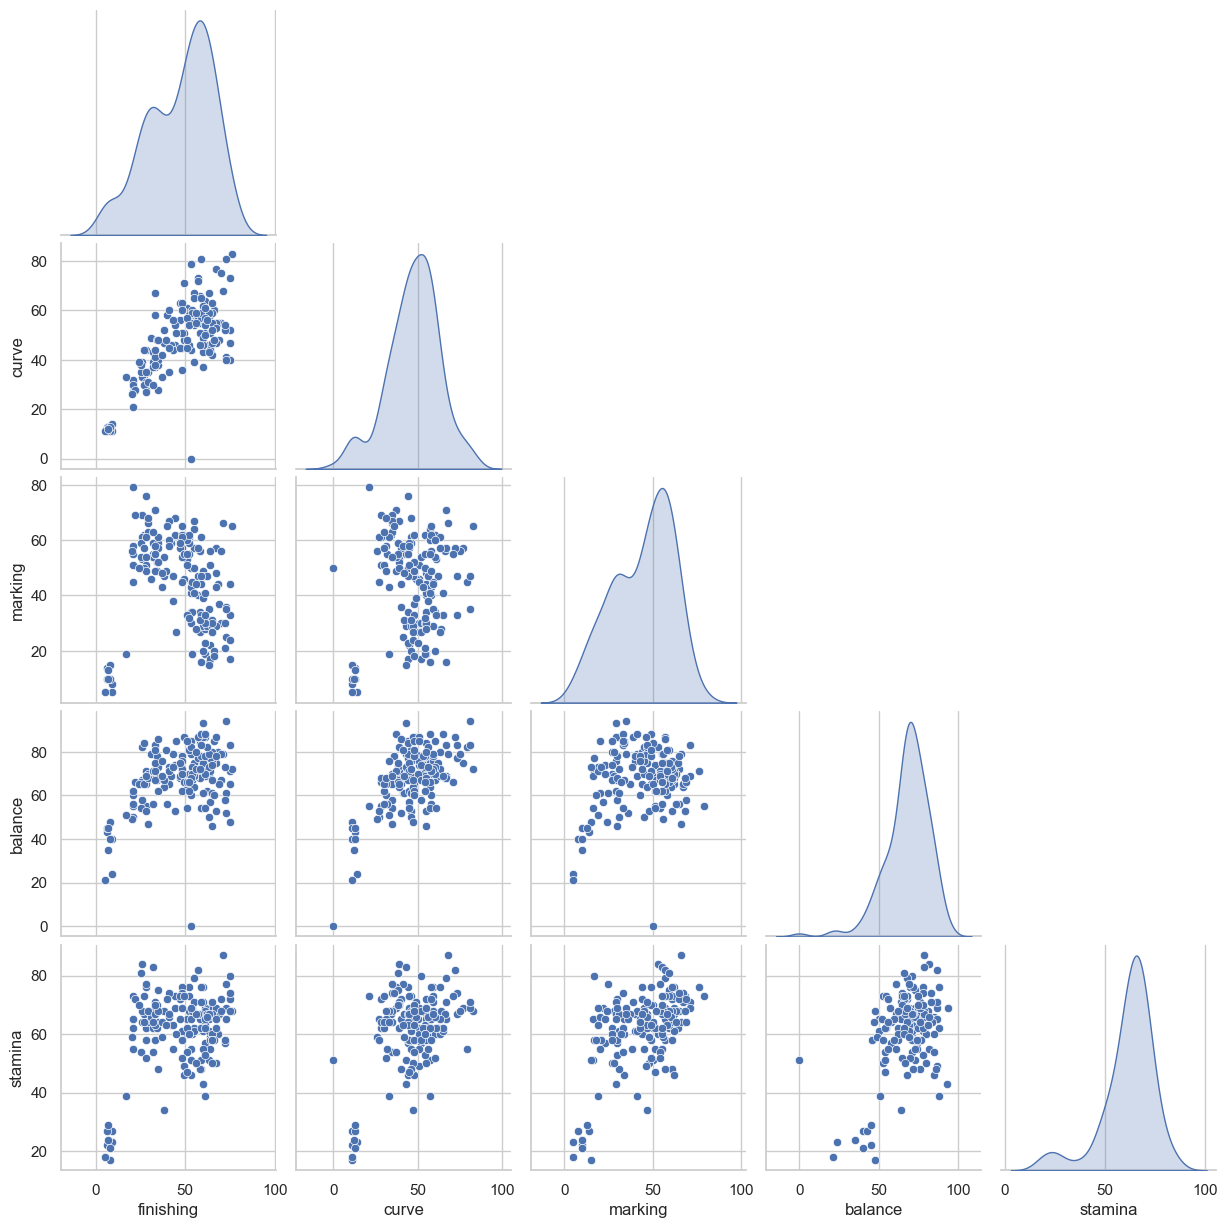

In [38]:
# Jugadores argentinos jóvenes con atributos físicos más relevantes
young_fifa_argentina_physical=young_fifa_argentina[['finishing', 'curve', 'marking', 'balance', 'stamina']]
sns.pairplot(young_fifa_argentina_physical, diag_kind = 'kde', corner= True)

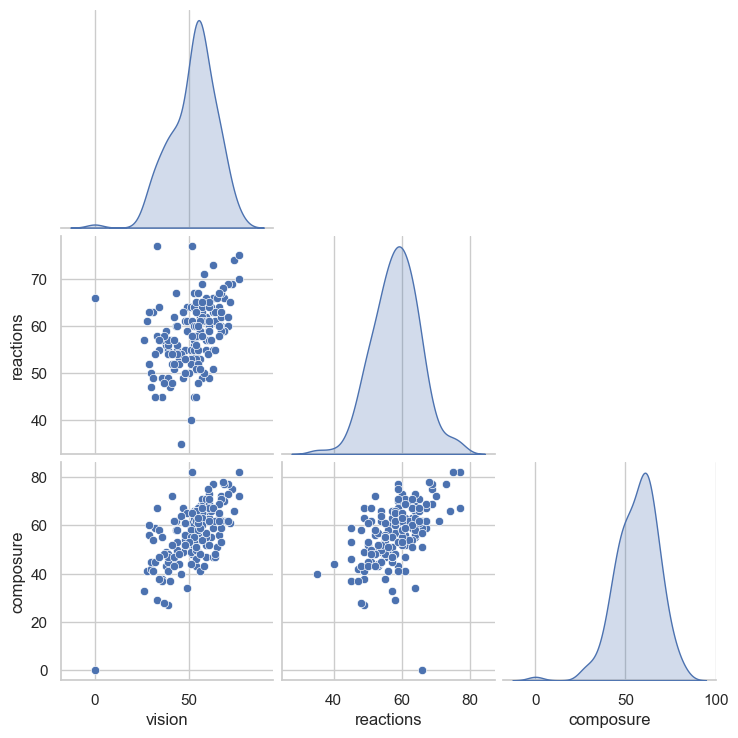

In [39]:
# Jugadores argentinos jóvenes con atributos mentales más relevantes
young_fifa_argentina_mental=young_fifa_argentina[['vision', 'reactions', 'composure']]
sns.pairplot(young_fifa_argentina_mental, diag_kind = 'kde', corner= True)

In [41]:
# Create Dataframe of Argentinian young players and mental and physical atributes included in OLS
young_fifa_argentina['phy_men']= young_fifa_argentina['finishing']+young_fifa_argentina['composure']+young_fifa_argentina['reactions']+young_fifa_argentina['stamina']+young_fifa_argentina['curve']+young_fifa_argentina['vision']+young_fifa_argentina['balance']+young_fifa_argentina['marking']

young_fifa_argentina

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_66765/1061722131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_fifa_argentina['phy_men']= young_fifa_argentina['finishing']+young_fifa_argentina['composure']+young_fifa_argentina['reactions']+young_fifa_argentina['stamina']+young_fifa_argentina['curve']+young_fifa_argentina['vision']+young_fifa_argentina['balance']+young_fifa_argentina['marking']


,age,ova,pot,value,wage,release clause,ir,attacking,crossing,finishing,...,standing tackle,sliding tackle,goalkeeping,height,name,nationality,club,bp,foot,phy_men
1142,19,68,70,0,0,0,1,227,69,53,...,36,0.0,72,180.34,L. Depetris,Argentina,Brescia,LW,Left,220.0
6968,21,76,83,11000000,5000,18700000,1,362,64,75,...,23,16.0,63,177.80,S. Driussi,Argentina,Zenit St. Petersburg,CAM,Right,509.0
7042,21,77,88,13500000,4000,23000000,1,275,65,28,...,78,80.0,51,182.88,E. Mammana,Argentina,Zenit St. Petersburg,CDM,Right,506.0
7129,20,65,79,1200000,400,0,1,258,41,57,...,49,47.0,50,175.26,M. Sánchez,Argentina,Club Atlético Lanús,CAM,Right,492.0
8318,21,71,82,4099999,900,6600000,1,317,45,73,...,27,25.0,69,177.80,M. Romero,Argentina,PSV,ST,Right,456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,17,56,72,180000,50000,383000,1,251,50,56,...,38,39.0,44,170.18,G. Infantino,Argentina,Rosario Central,LM,Left,428.0
16761,18,62,81,600000,75000,1200000,1,244,49,51,...,65,68.0,61,187.96,A. Baldi,Argentina,Club Atlético Tigre,CDM,Left,385.0
16774,20,57,67,160000,200,264000,1,242,43,39,...,59,62.0,47,170.18,I. Tierno,Argentina,Club Atlético Huracán,RB,Right,433.0
16799,19,56,68,150000,200,255000,1,247,56,43,...,49,43.0,53,175.26,T. Pozzo,Argentina,Independiente,LM,Left,420.0


In [43]:
# Players with best overall score and position

phy_men=young_fifa_argentina.sort_values(['phy_men'], ascending=[False]).head(100)
selected_bpay=phy_men[['name', 'club', 'phy_men', 'bp', 'value']]
selected_bpay.head(20)

,name,club,phy_men,bp,value
9277,E. Palacios,Bayer 04 Leverkusen,605.0,CM,13500000
11502,A. Mac Allister,Brighton & Hove Albion,583.0,CAM,11000000
12064,C. Ferreira,River Plate,562.0,CAM,3000000
13594,J. Álvarez,River Plate,562.0,CAM,4600000
13368,T. Almada,Vélez Sarsfield,557.0,CAM,8500000
11059,N. Bustos,Club Atlético Talleres,551.0,ST,10000000
13883,A. Bernabei,Club Atlético Lanús,535.0,LWB,3000000
15692,M. Esquivel,Club Atlético Lanús,532.0,LM,1100000
9555,M. Valenzuela,Columbus Crew SC,521.0,LB,3500000
13810,N. Capaldo,Boca Juniors,520.0,CM,1300000
